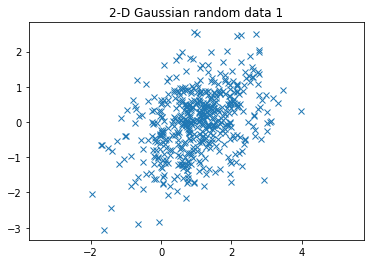

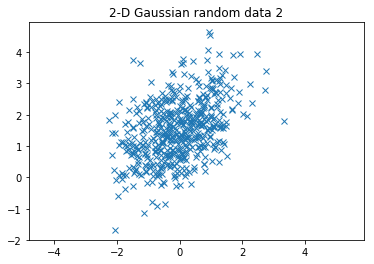

In [9]:
# Generate fake data
import numpy as np
import matplotlib.pyplot as plt

mul1, sigma1 = [1, 0], [[0.9, 0.4], [0.4, 0.9]]
mul2, sigma2 = [0, 1.5], [[0.9, 0.4], [0.4, 0.9]]
size = 500

dummyData1 = np.random.multivariate_normal(mean=mul1, cov=sigma1, size=size)
dummyData2 = np.random.multivariate_normal(mean=mul2, cov=sigma2, size=size)

def plotAns(data, center=None, title=None):
    plt.plot(data[:, 0], data[:, 1], 'x')
    if center:
        plt.plot(center[:, 0], center[:, 1], 'o')
    plt.axis('equal')
    plt.title(title)
    plt.show()
plotAns(dummyData1, None, '2-D Gaussian random data 1')
plotAns(dummyData2, None, '2-D Gaussian random data 2')

In [22]:
# K means
import numpy as np
from data import *
from scipy.spatial.distance import cdist

class mykmeans():
    def __init__(self, X, k, c):
        self.X = X
        self.k = k
        self.c = c
        self.i = 0
    
    def __call__(self, max_iter=10000):
        diag = np.eye(self.k)
        for i in range(max_iter):
            self.i = i
            prev_c = np.copy(self.c)
            dist = cdist(self.X, self.c)
            cluster_idx = np.argmin(dist, axis=1)
            cluster_idx = diag[cluster_idx]
            self.c = np.sum(self.X[:, None, :] * cluster_idx[:, :, None], axis=0) / \
                     np.sum(cluster_idx, axis=0)[:, None]
            if np.linalg.norm(prev_c-self.c)<1e-3:
                break

The center of dummy data 1 is [[ 1.55823178  0.66891232]
 [ 0.48099731 -0.66138357]].
After 10 iteration.


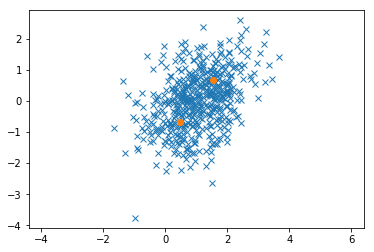

The center of dummy data 2 is [[ 0.52669005  1.98505451]
 [-0.74316342  0.76821073]].
After 6 iteration.


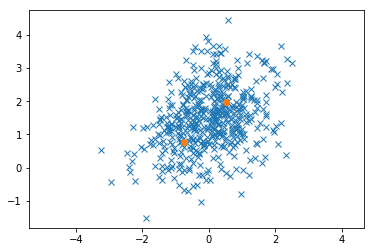

--------------------------------------------------
The center of dummy data 2 is [[ 1.886803    0.87873391]
 [ 0.03966866 -1.04237359]
 [ 1.45920828 -0.64343969]
 [ 0.57179255  0.39756187]].
After 10 iteration.


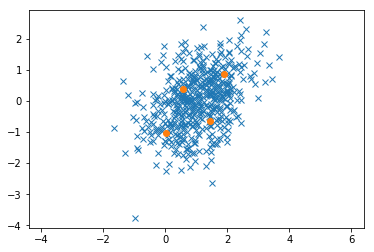

The center of dummy data 2 is [[ 0.72038622  2.70432228]
 [-1.04695307  0.38642346]
 [ 0.66374867  1.13837826]
 [-0.58342486  1.73914073]].
After 15 iteration.


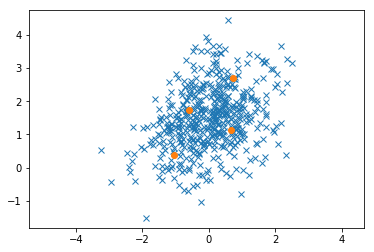

In [28]:
center1 = np.array([[10., 10.], [-10., -10.]])
k2_1 = mykmeans(X=dummyData1, k=2, c=center1)
k2_1.__call__()
k2_2 = mykmeans(X=dummyData2, k=2, c=center1)
k2_2.__call__()
print("The center of dummy data 1 is {}.".format(k2_1.c))
print("After {} iteration.".format(k2_1.i))
plotAns(dummyData1, k2_1.c)
print("The center of dummy data 2 is {}.".format(k2_2.c))
print("After {} iteration.".format(k2_2.i))
plotAns(dummyData2, k2_2.c)
print("-----"*10)

center2 = np.array([[10., 10.], [-10., -10.], [10., -10.], [-10., 10.]])
k4_1 = mykmeans(X=dummyData1, k=4, c=center2)
k4_1.__call__()
k4_2 = mykmeans(X=dummyData2, k=4, c=center2)
k4_2.__call__()
print("The center of dummy data 2 is {}.".format(k4_1.c))
print("After {} iteration.".format(k4_1.i))
plotAns(dummyData1, k4_1.c)
print("The center of dummy data 2 is {}.".format(k4_2.c))
print("After {} iteration.".format(k4_2.i))
plotAns(dummyData2, k4_2.c)